In [24]:
import numpy as np
from numpy.random import Generator, PCG64
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = Generator(PCG64())

# Task 1

## a)

In [63]:
n = 500
ind = rng.binomial(1, 0.7, n)
normal_1_1 = rng.normal(1, 1, n)
normal_5_2 = rng.normal(5, 2, n)
X = normal_1_1 * (1-ind) + normal_5_2 * ind
mu_0 = 1
mu_1 = 5
sigma_0 = 1
sigma_1 = 2
pi_0 = 0.3
pi_1 = 0.7

In [64]:
x = np.linspace(-2, 10, 100)
0.3 * norm.pdf(x, 1, 1) + 0.7 * norm.pdf(x, 5, 2)

array([0.00163499, 0.00227555, 0.00313517, 0.00427253, 0.00575532,
       0.00765923, 0.0100657 , 0.01305867, 0.01671984, 0.02112279,
       0.026326  , 0.03236528, 0.03924602, 0.0469362 , 0.05536079,
       0.06439852, 0.07388175, 0.08359991, 0.09330696, 0.10273252,
       0.11159628, 0.11962467, 0.12656839, 0.13221946, 0.13642605,
       0.13910374, 0.14024205, 0.1399055 , 0.13822928, 0.13540963,
       0.13169014, 0.12734516, 0.12266182, 0.11792238, 0.11338819,
       0.10928656, 0.10580122, 0.10306675, 0.10116693, 0.10013654,
       0.09996602, 0.10060807, 0.10198546, 0.10399906, 0.10653572,
       0.10947525, 0.11269626, 0.11608087, 0.11951806, 0.12290595,
       0.12615315, 0.12917933, 0.13191526, 0.1343025 , 0.13629289,
       0.13784798, 0.13893837, 0.13954315, 0.13964932, 0.13925134,
       0.1383506 , 0.13695497, 0.13507837, 0.13274024, 0.12996507,
       0.1267818 , 0.12322331, 0.11932574, 0.11512788, 0.11067049,
       0.10599565, 0.1011461 , 0.09616455, 0.09109315, 0.08597

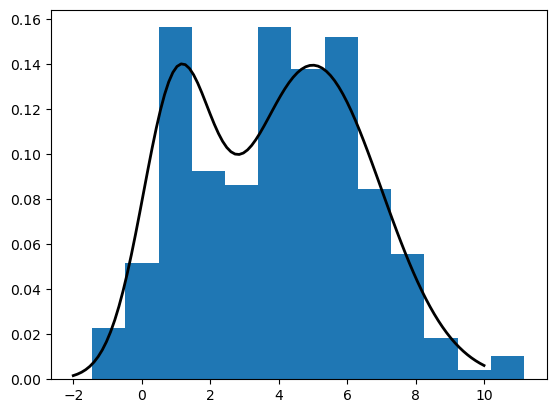

In [65]:
hist, bin_edges = np.histogram(x, density=True)
plt.hist(X, bins='auto', density=True)  # arguments are passed to np.histogram
plt.plot(x, 0.3 * norm.pdf(x, 1, 1) + 0.7 * norm.pdf(x, 5, 2), color='k', linestyle='-', linewidth=2)

## b)

In [66]:
np.sum(ind * (np.log(norm.pdf(X, 1, 1)) + np.log(pi_1)) + (1-ind) * (np.log(norm.pdf(X, 5, 2)) + np.log(pi_0)))

-4739.890070731539

## c)

In [120]:
x = normal_1_1 * (1-ind) + normal_5_2 * ind
mu_0 = 1
mu_1 = 5
sigma_0 = 1
sigma_1 = 2
pi_0 = 0.3
pi_1 = 0.7

In [121]:
gammas = (pi_1 * norm.pdf(x, mu_1, sigma_1))/(pi_0 * norm.pdf(x, mu_0, sigma_0) + pi_1 * norm.pdf(x, mu_1, sigma_1))

## d)

In [511]:
n = 500
ind = rng.binomial(1, 0.7, n)
normal_1_1 = rng.normal(1, 1, n)
normal_5_2 = rng.normal(5, 2, n)
mu_0 = 0.5
mu_1 = 2
sigma_0 = 0.7
sigma_1 = 1.5
pi = 0.3
x = normal_1_1 * (1-ind) + rng.normal(5, 2, n) * ind

In [516]:
while True:
    prev_pi = pi
    gammas = (pi * norm.pdf(x, mu_1, np.sqrt(sigma_1)))/((1 - pi) * norm.pdf(x, mu_0, np.sqrt(sigma_0)) + pi * norm.pdf(x, mu_1, np.sqrt(sigma_1)))
    
    mu_0 = np.sum((1-gammas) * x)/np.sum((1-gammas))
    mu_1 = np.sum(gammas * x)/np.sum(gammas)
    
    sigma_0 = np.sum((1-gammas) * (x - mu_0)**2)/np.sum((1-gammas))
    sigma_1 = np.sum(gammas * (x - mu_1)**2)/np.sum(gammas)
    
    pi = np.sum(gammas)/n
    if np.abs(pi - prev_pi) < 0.001:
        break
print(f"mu_0:{mu_0}")
print(f"sigma_0:{np.sqrt(sigma_0)}")
print(f"mu_1:{mu_1}")
print(f"sigma_1:{np.sqrt(sigma_1)}")
print(f"pi:{pi}")


mu_0:0.9700508521241332
sigma_0:0.8631905113920665
mu_1:4.780876076504053
sigma_1:2.1014964492832156
pi:0.7597039859493391


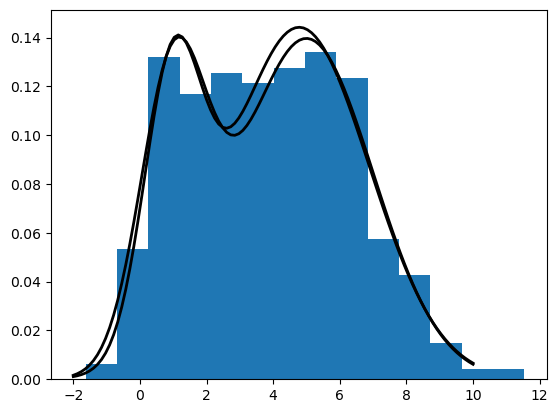

In [517]:
hist, bin_edges = np.histogram(x, density=True)
plt.hist(x, bins='auto', density=True)  # arguments are passed to np.histogram
xs = np.linspace(-2, 10, 100)
plt.plot(xs, 0.3 * norm.pdf(xs, 1, 1) + 0.7 * norm.pdf(xs, 5, 2), color='k', linestyle='-', linewidth=2)
plt.plot(xs, (1-pi) * norm.pdf(xs, mu_0, np.sqrt(sigma_0)) + pi * norm.pdf(xs, mu_1, np.sqrt(sigma_1)), color='k', linestyle='-', linewidth=2)